<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210609_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings('ignore')

`sklearn.datasets`에서 제공해주는 다양한 샘플 데이터 중 `iris 데이터셋을 사용`

# iris 데이터셋
**붓꽃 종류 분류하기**

들에 있는 꽃들을 조사핳ㄴ 데이터가 있다. 꽃받침의 너비와 길이, 꽃잎의 너비와 길이를 측정해서 'setosa', `versicolour`, `virginica`로 분류해 놓음



In [4]:
# iris 데이터셋 로딩
from sklearn.datasets import load_iris
iris = load_iris()

## 데이터셋의 정보 확인하기
'DESCR'

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**feature**는 data로 확인 가능

In [6]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**feature_names**: 데이터의 이름

In [7]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**sepal** : 꽃 받침
**petal** : 꽃잎

**target**

In [8]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터 프레임 만들기

In [10]:
import pandas as pd
df_iris = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df_iris['target'] = iris['target']
df_iris.head()
#데이터가 예쁘게 나열되어 있어 셔플 해야 된다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#시각화 (seaborn)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sepal_columns = [df_iris.columns[0], df_iris.columns[1]]
sepal_columns

['sepal length (cm)', 'sepal width (cm)']

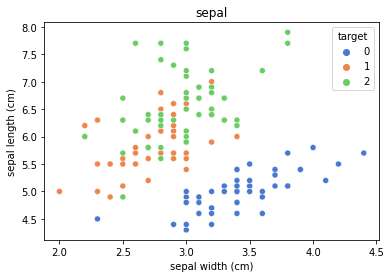

In [19]:
# 꽃받침에 대한 꽃들의 종류를 시각화
# x축 : 꽃받침의 너비, y축 : 꽃받침의 길이

sns.scatterplot(
    sepal_columns[1],
    sepal_columns[0],
    hue='target',
    palette='muted',
    data=df_iris
)
plt.title('sepal')
plt.show()

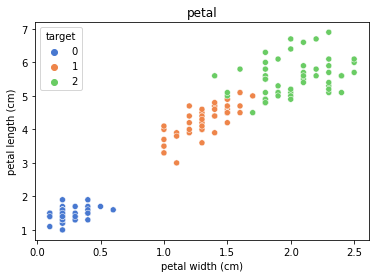

In [20]:
petal_columns = [df_iris.columns[2], df_iris.columns[3]]
sns.scatterplot(
    petal_columns[1],
    petal_columns[0],
    hue='target',
    palette='muted',
    data=df_iris
)
plt.title('petal')
plt.show()

분산이 크다는 말은 데이터가 보기 편하다?????
